### Credit Card Fraud Detection
You can download the csv files from the project folder on Canvas.  <br>

#### Context
Credit card companies aim to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

#### Content
The dataset contains transactions made by credit cards in September 2013 by european cardholders.
Transactions occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, as the positive class (frauds) account for 0.172% of all transactions. <br>

It contains numerical input variables V1-V28 which are the result of a Principal Component Analysis (PCA) transformation, as original features are not provided due to confidentiality issues. Features that have not been transformed with PCA are 'Time' and 'Amount'. 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 'Amount' denotes the transaction Amount. 'Class' is the response variable (labelled outcome) and it takes value 1 in case of fraud and 0 otherwise.  <br>

### Module 1: Data Exploration
Load `creditcard_train.csv` and explore the dataset. How do the data look like? Are there any missing values? What do you do with missing values, i.e. removal, imputation, etc.?<br>
Are there any outliers? What do you do with outliers, i.e. drop them, explore the effects of outliers on models, etc.? <br>
Record your analysis procedures. For example, 20 observations are removed due to missingness, and 3,000 observations remain for further analysis. <br>

Hint: for removal of extreme outliers, consider: Q1=df.quantile(0.25); Q3=df.quantile(0.75); IQR=Q3-Q1; <br>
Remove samples that are smaller than Q1 - 2.5 * IQR or larger than Q3 + 2.5 * IQR.

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

pd.options.display.max_columns = None


#read csv file
data = pd.read_csv('creditcard_train.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
#check the numbers of fraud and normal data
data['Class'].value_counts()

0    284215
1       442
Name: Class, dtype: int64

In [3]:
#some statistics
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284379.000000,284137.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000
mean,94820.043168,0.000942,-0.000761,0.001280,-0.000844,0.000591,0.000233,0.000956,-0.000145,0.000553,0.001220,-0.000789,0.001301,-0.000026,0.001392,0.000093,0.000833,0.001378,0.000467,-0.000078,-0.000092,-0.000075,-0.000035,0.000011,0.000045,-0.000016,0.000008,-0.000056,-0.000008,88.340966,0.001553
std,47486.331846,1.955946,1.649907,1.510265,1.413999,1.378060,1.332089,1.230796,1.192554,1.097575,1.083311,1.018266,0.992078,0.995291,0.950934,0.915270,0.872257,0.837035,0.836578,0.813759,0.770867,0.733731,0.725929,0.625052,0.605657,0.521244,0.482238,0.403245,0.330077,250.129519,0.039374
min,0.000000,-56.407510,-72.715728,-48.325590,-5.683171,-113.743300,-26.160506,-43.557240,-73.216718,-13.434070,-24.588260,-4.797473,-18.683710,-5.791881,-19.214325,-4.498945,-14.129850,-24.019099,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565680,-15.430080,0.000000,0.000000
25%,54208.000000,-0.920083,-0.598696,-0.889759,-0.848833,-0.691445,-0.768153,-0.553921,-0.208633,-0.642783,-0.535141,-0.762556,-0.405263,-0.648589,-0.425267,-0.582729,-0.467742,-0.483646,-0.498668,-0.456291,-0.211747,-0.228421,-0.542878,-0.162192,-0.354543,-0.317147,-0.326978,-0.070844,-0.052954,5.600000,0.000000
50%,84704.000000,0.018393,0.065213,0.179930,-0.020146,-0.054336,-0.274058,0.040115,0.022323,-0.051198,-0.092736,-0.032942,0.140170,-0.013587,0.050731,0.048170,0.066504,-0.065551,-0.003449,0.003729,-0.062507,-0.029518,0.007694,-0.011614,0.041012,0.016532,-0.052152,0.001326,0.011233,22.000000,0.000000
75%,139324.000000,1.315753,0.803360,1.027294,0.742826,0.611926,0.398611,0.570420,0.327241,0.597343,0.454159,0.739310,0.618276,0.662503,0.493239,0.648848,0.523349,0.399695,0.500838,0.458794,0.132994,0.186287,0.529204,0.148051,0.439603,0.350702,0.240932,0.091001,0.078243,77.150000,0.000000
max,172792.000000,2.454930,22.057730,9.382558,16.875340,34.801666,73.301630,120.589500,20.007208,15.594990,23.745140,12.018913,7.848392,7.126883,10.526766,8.877742,17.315110,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528410,4.584549,7.519589,3.517346,31.612200,33.847808,25691.160000,1.000000


From the chart above, we can see that data in V1-V28 is all quite close to 0. The mean of the amount is about 88 and standard deviation is about 250.

#### missing values

In [4]:
#check missing values
data.isnull().sum()

Time        0
V1          0
V2          0
V3          0
V4          0
V5          0
V6          0
V7          0
V8          0
V9          0
V10         0
V11         0
V12         0
V13         0
V14         0
V15         0
V16         0
V17         0
V18         0
V19         0
V20         0
V21         0
V22       278
V23       520
V24         0
V25         0
V26         0
V27         0
V28         0
Amount      0
Class       0
dtype: int64

In V22 and V23 there exist missing values, so I'd like to look at them in detail in case they are related to fraud.

In [5]:
#check the rows with missing values
v22 = data[pd.isnull(data['V22'])]
v22

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
102,69.0,0.298503,2.142722,-1.542143,1.561332,0.938108,-2.145673,1.405569,-0.778459,0.328636,0.127497,1.612799,-0.096377,0.654790,-4.318378,1.038603,0.404687,2.729168,1.115864,-0.703814,0.676954,-0.290987,NaN,0.092174,0.586205,-0.397314,-0.480949,0.251145,-0.242279,0.78,0
341,251.0,1.206638,0.143345,-0.131756,0.902486,0.219547,-0.028155,0.099295,0.002020,0.166709,-0.014766,-1.072738,-0.471208,-0.752134,0.548864,1.333077,0.046136,-0.401577,-0.213131,-0.415565,-0.149145,0.006414,NaN,-0.186810,-0.777284,0.686915,-0.246620,0.018176,0.011324,31.80,0
1044,791.0,1.059212,0.031148,0.246141,1.232533,0.057849,0.357054,0.040610,0.121939,-0.003625,0.013792,0.927695,1.294673,0.193732,0.184263,-0.802536,-0.441178,-0.124917,-0.408731,0.029081,-0.055775,-0.040772,NaN,-0.158391,-0.275728,0.672241,-0.315803,0.029463,0.011025,52.93,0
1805,1404.0,1.162200,-0.793072,0.707449,-0.659304,-1.316011,-0.713438,-0.616544,-0.072424,-1.032867,0.720385,1.752800,0.428950,0.539781,-0.079468,0.158366,1.446030,-0.028252,-1.030047,0.703515,0.294324,0.116896,NaN,0.026939,0.549121,0.165753,-0.452974,-0.000709,0.033406,102.00,0
2007,1549.0,1.114878,-0.666727,0.201707,0.640361,1.139395,4.764422,-1.584590,1.316518,1.573552,-0.335481,-1.240258,0.606075,-0.253060,-0.944858,-1.408034,-0.191923,-0.183847,0.227906,0.543599,-0.012989,-0.112088,NaN,-0.145503,1.046136,0.710850,-0.211124,0.108306,0.034743,24.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274648,166210.0,-1.431126,-1.222767,0.090968,-2.933158,0.374237,-0.422459,-0.895324,0.433657,-2.420205,0.675330,-0.218797,-0.259152,0.839526,-0.132923,-1.573402,0.084282,-0.115075,0.650289,-0.224036,-0.445260,-0.030306,NaN,-0.476678,0.116168,-0.087395,-0.303947,0.000070,-0.148212,20.00,0
276484,167208.0,0.513047,-1.652826,-2.486744,4.112840,0.414860,0.047780,1.695311,-0.336334,-1.780072,1.444747,0.481905,-0.267418,-1.104436,1.323777,-1.167354,0.816190,-0.891360,0.169231,-1.457288,1.188310,0.634046,NaN,-0.613968,0.765273,0.044355,0.011005,-0.243423,0.058293,754.13,0
277152,167576.0,-0.138022,0.321958,1.110920,1.454802,-0.862326,2.025506,-2.092863,-2.040537,0.350053,-1.122781,0.200508,-0.010287,-1.416780,-1.049790,0.466496,0.098900,1.602776,1.589301,2.822066,1.099261,-1.427894,NaN,-0.239989,0.123302,0.918102,1.061858,0.063546,0.222576,83.50,0
280317,169538.0,-1.111834,1.406679,-0.054398,0.797061,0.781671,-0.318739,1.032628,0.208575,-0.739602,-0.374462,-2.156656,-1.370987,-2.091376,1.097946,0.136941,-0.792820,0.282733,0.152628,1.223502,-0.259378,0.054031,NaN,-0.607505,-0.805241,1.149048,-0.154614,-0.363659,-0.010285,27.08,0


In [6]:
#check if missing values are related to class
print(v22['Class'].value_counts())

0    278
Name: Class, dtype: int64


In [7]:
#check the rows with missing values
v23 = data[pd.isnull(data['V23'])]
v23

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
190,125.0,-2.807065,1.183098,2.974779,2.801477,-0.475110,3.217829,-0.401608,0.384395,2.408675,3.351079,0.106956,0.367099,-0.150263,-2.449671,0.182057,-2.372316,1.614255,-2.013091,-0.572184,0.829197,-0.201782,1.461535,NaN,-0.581133,-0.101785,0.529386,0.362411,0.237647,43.71,0
447,324.0,-0.622317,0.656826,1.094225,0.054665,0.746405,-0.973848,0.386710,-0.009876,-0.351714,-0.472724,-0.660362,-0.107074,0.437839,-0.483415,0.927098,0.517586,-0.190002,0.023140,0.114295,0.261014,-0.259937,-0.798558,NaN,-0.199902,-0.062407,0.104703,0.230467,0.102421,0.89,0
752,562.0,-0.312911,0.815136,1.405270,0.070527,0.058558,-1.030855,0.760191,-0.182238,0.037325,-0.244487,-0.443463,-1.156897,-1.765281,-0.263622,1.131916,0.387982,0.010268,0.068987,-0.073973,0.102080,-0.326542,-0.821322,NaN,0.276734,-0.243046,0.049775,0.064619,-0.126739,10.99,0
847,646.0,-0.691375,0.348838,1.792883,-0.178102,1.057957,1.780065,0.520891,0.208006,0.111160,0.003182,1.939922,0.760465,-0.835731,-0.245875,0.102825,-1.620417,0.810596,-1.995284,-0.848036,-0.145018,-0.069795,0.333184,NaN,-1.008831,-0.425738,0.262964,-0.492098,-0.423527,1.18,0
1036,784.0,1.017365,-0.601123,1.735855,1.088302,-1.464582,0.501231,-1.071971,0.370302,1.635486,-0.492857,-0.743369,0.791613,-0.346296,-0.903683,-0.828769,-0.666360,0.667500,-0.854673,-0.189495,-0.112247,-0.006876,0.371963,NaN,0.490053,0.216836,0.579526,0.050536,0.031099,37.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278745,168506.0,0.151692,0.339658,0.453092,-0.283271,1.049401,-1.117242,1.087664,-0.724470,0.237500,0.158174,-0.856984,-0.061089,0.080045,-0.269954,-0.088471,-0.412468,-0.513629,-0.701038,0.494862,-0.051335,-0.287291,-0.393941,NaN,-0.096888,-0.995911,0.082764,-0.339423,-0.366418,0.89,0
279262,168847.0,1.952425,0.046062,-1.576186,1.318851,0.314682,-0.898937,0.473973,-0.208334,0.129791,0.458306,0.582278,0.356139,-1.648550,0.994970,-1.082223,-0.505362,-0.272695,-0.031864,0.038410,-0.348135,0.100672,0.389546,NaN,-0.011086,0.368082,-0.509305,-0.029373,-0.071727,22.29,0
279729,169152.0,-3.635813,3.711787,-3.149754,-1.739089,-0.297295,-1.615713,0.351594,1.151963,1.331123,2.661543,-0.006501,0.114740,-1.785985,1.303390,-0.605369,-0.193938,-0.325242,0.365193,-0.032392,0.964474,-0.005328,0.601108,NaN,-0.447803,0.271079,0.101288,0.695478,0.240983,0.77,0
280865,169877.0,2.063303,0.021825,-1.303005,0.357877,0.031969,-1.274402,0.275638,-0.406445,0.527834,-0.006649,-0.568555,0.554155,0.506209,0.405168,0.739271,-0.295956,-0.471882,-0.208245,-0.306988,-0.221361,0.256744,0.935292,NaN,0.036357,0.267812,-0.107122,-0.013723,-0.058050,2.69,0


In [8]:
#check if missing values are related to class
print(v23['Class'].value_counts())

0    520
Name: Class, dtype: int64


In [9]:
#check intersection
print(pd.merge(v22, v23).shape)

(0, 31)


The above shows that missing values in v22 and v23 have no relationship, and there is also no relation between missing values and class. I decide to fill them with column means so that I will not lose information.

In [10]:
#fill the missing values
data = data.fillna(data.mean())

#### outliers

In order to reduce the effect of extreme cases in fraud data, I decide to drop outliers in fraud group

In [11]:
#select fraud data
fraud_data = data[data['Class'] == 1]
fraud_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
622,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4916,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6104,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6325,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
6327,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,-6.187891,5.664395,-9.854485,-0.306167,-10.691196,-0.638498,-2.041974,-1.129056,0.116453,-1.934666,0.488378,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279719,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537502,0.788395,0.292680,0.147968,390.00,1
279998,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248526,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280004,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
280998,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884875,-0.253700,245.00,1


In [12]:
#calculate IQR
Q1=fraud_data.quantile(0.25)
Q3=fraud_data.quantile(0.75)
IQR=Q3-Q1

#drop extreme fraud data(with 2.5IQR)
data25 = data.drop(fraud_data[((fraud_data < Q1 - 2.5 * IQR) | (fraud_data > Q3 + 2.5 * IQR)).any(axis=1)].index.values)
data25.reset_index(drop = True, inplace= True)
data25

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284518,172786.0,-11.881120,10.071780,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284519,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284520,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296826,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395653,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284521,172788.0,-0.240440,0.530482,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509929,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546669,0.108821,0.104533,10.00,0


There remain 284523 rows, 134 rows are deleted.

### Module 2: Data Visualization
What are the distributions of variables? Are the variables distributed differently in the Fraud group and in the Normal group? Use tables and/or figures to visualize your exploration and findings. Present no more than 5 figures/tables that you think are important, and you may state in your findings that other variables a, b, c have similar patterns.

Text(0.5, 1.0, 'Time distribution')

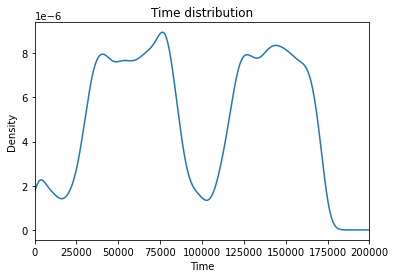

In [13]:
#time distribution
data25['Time'].plot(kind = 'kde')
plt.xlim([0, 200000])
plt.xlabel('Time')
plt.title('Time distribution')

There are two peak of transactions and around 100000, the number of transactions slump significantly.

In [14]:
import seaborn as sns; sns.set()
#divide the data
fraud_data = data25[data25['Class'] == 1]
normal_data = data25[data25['Class'] == 0]

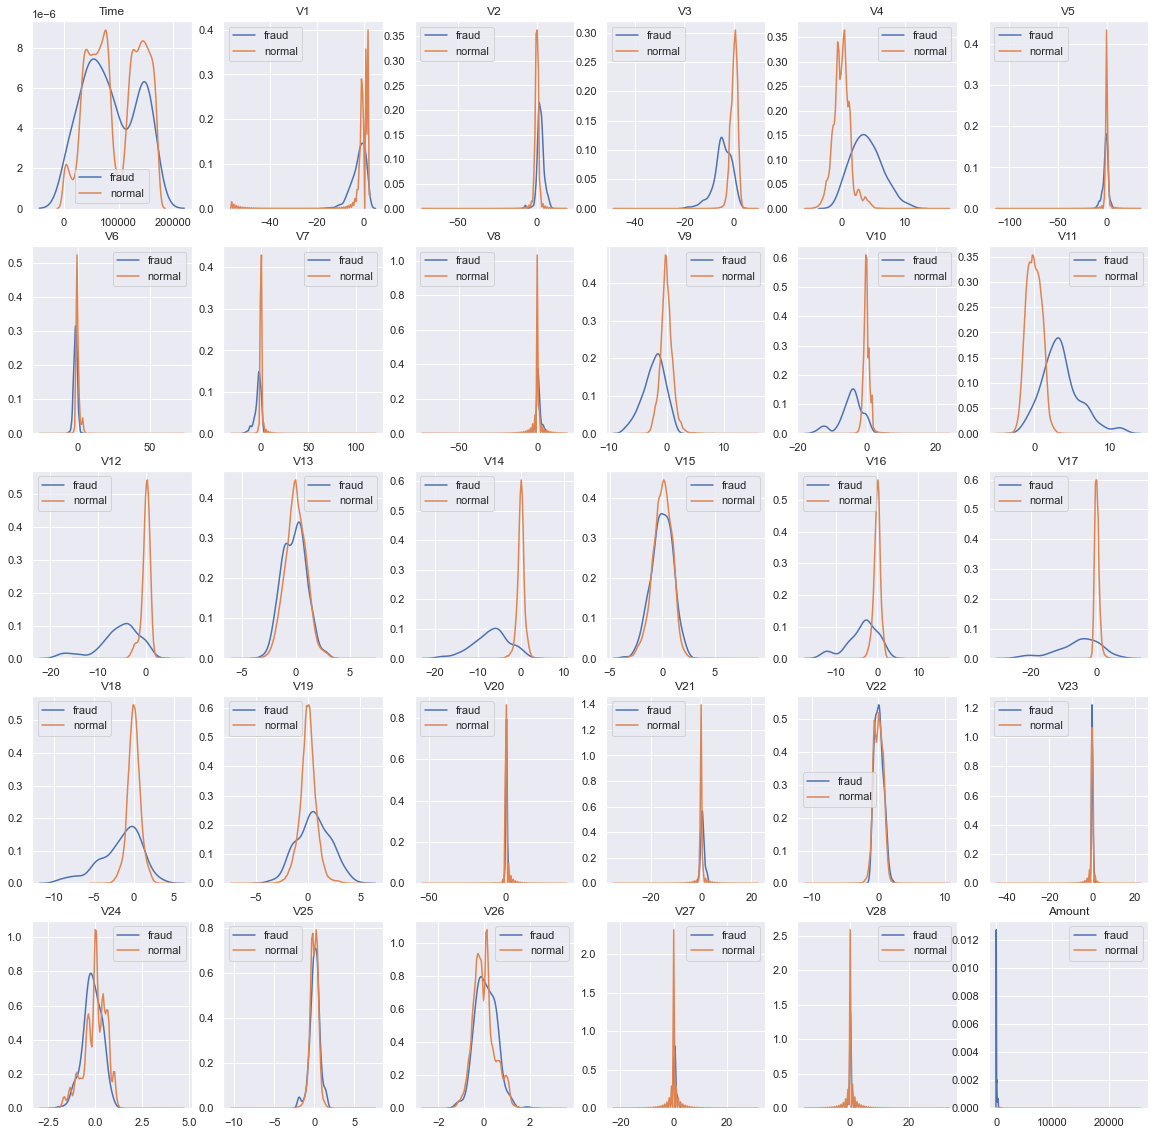

In [15]:
#distribution of all variables
f, axes = plt.subplots(5,6,figsize=(20, 20))

for i, ax in enumerate(axes.flat):
    plt.subplot(5, 6, i+1)
    sns.kdeplot(fraud_data.iloc[:, i], label='fraud')
    sns.kdeplot(normal_data.iloc[:, i], label='normal')
    plt.title(data25.columns.values[i])

From the above figure, fraud data in v3,9,10,12,14,16,17 are relatively smaller than normal, while data in v2,4,11,19 are relatively bigger. The distribution of amount needs further exploring since it's too skewed to see any detail.

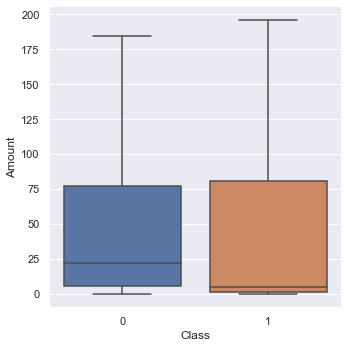

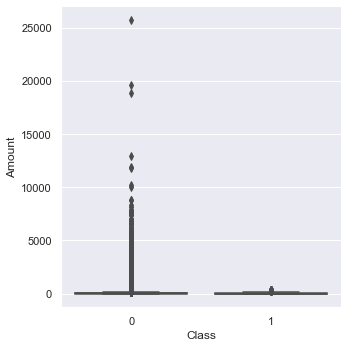

In [16]:
#box plot amount
sns.catplot('Class', 'Amount', data=data25, kind='box', showfliers=False)
sns.catplot('Class', 'Amount', data=data25, kind='box', showfliers=True)

the distributions of the main parts of fraud and normal data are similar, but the outliers in normal group are quite extreme: the biggest one is over 25000

### Module 3: Dimension Reduction
Apply unsupervised learning methods to achieve dimension reduction. Visualize and interpret the results. Any dimension reduction algorithms can be used.

since the amount and time are unscaled, I decide to scale them before dimension reduction

In [17]:
#scale the data
from sklearn.preprocessing import StandardScaler
data25_re = data25.copy()
data25_re['scaled_amount'] = StandardScaler().fit_transform(data25_re['Amount'].values.reshape(-1,1))
data25_re['scaled_time'] = StandardScaler().fit_transform(data25_re['Time'].values.reshape(-1,1))
data25_re.drop(['Time', 'Amount'], inplace=True, axis=1)
data25_re

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.245446,-1.997039
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342249,-1.997039
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.161567,-1.997018
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140971,-1.997018
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073060,-1.996997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284518,-11.881120,10.071780,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.349929,1.641680
284519,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,-0.253853,1.641701
284520,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296826,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395653,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,-0.081500,1.641722
284521,-0.240440,0.530482,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509929,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546669,0.108821,0.104533,0,-0.313010,1.641722


In [18]:
#fit the moodel
from sklearn.decomposition import PCA
x = data25_re.drop(['Class'], axis =1)
y = data25_re['Class']

model = PCA(n_components = 2)
x_transformed = model.fit_transform(x)
x_transformed.shape

(284523, 2)

Text(0.5, 1.0, 'Principal Component Analysis of Fraud')

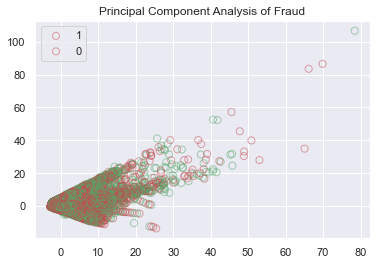

In [19]:
#visualize the result
targets = [1, 0]
colors = ['r', 'g']
x_transformed_df = pd.DataFrame(data = x_transformed, 
                                   columns = ['principal component 1', 'principal component 2'])
for target, color in zip(targets, colors):
    indicesToKeep = data25_re[data25_re['Class'] == target].index.values
    plt.scatter(x_transformed_df.loc[indicesToKeep, 'principal component 1'], 
                x_transformed_df.loc[indicesToKeep, 'principal component 2'], facecolors='none', edgecolors=colors, alpha=0.5, s=50, label=target)

plt.legend()
plt.title("Principal Component Analysis of Fraud")

red is fraud and green is normal. It's hard to distinguish two groups. So two PCA components may not be sufficient to represent the data.

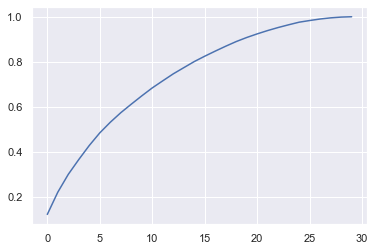

In [20]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

The above figure also shows that two dimensions are not enough.

### Module 4: Classification
Choose three classification methods and build classification models, using 5-fold cross-validation. <br>

Further, load `creditcard_test.csv` and use it as the test dataset to evaluate your models and compare their performance. Consider visualizing the results, and evaluate the results using metrics such as the overall accuracy and the confusion matrix. <br>

Hint: because the dataset is highly unbalanced, consider undersampling, i.e. randomly select N normal observations of the same size as the N fraud observations, and use N+N=2N samples for model fitting and training. 

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [22]:
#undersample
fraud_data25 = data25[data25['Class'] == 1]
normal_data25 = data25[data25['Class'] == 0]

normal_data25_sample = normal_data25.sample(n=308, random_state = 1)

new_data25 = pd.concat([fraud_data25, normal_data25_sample])
new_data25 = new_data25.sample(frac = 1, random_state = 1)
new_data25

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
247894,153810.0,2.102483,-1.302057,0.379806,-0.486967,-1.830271,-0.165263,-1.633904,0.141010,1.060734,0.512842,-1.350358,-0.271379,-0.147355,-1.165787,-1.012807,0.901762,0.522370,-1.280828,0.803341,-0.082014,0.134621,0.697336,0.242691,0.074266,-0.352713,-0.191125,0.060721,-0.037540,4.50,0
115441,73926.0,-0.358848,1.041270,1.036228,-0.478006,0.735329,0.239826,0.662786,0.102625,-0.733089,-0.176926,0.274549,0.784897,1.304980,0.034228,0.123985,0.739459,-1.202469,0.449888,0.807491,0.227672,-0.251827,-0.640596,-0.211188,-1.019347,-0.004085,0.134239,0.266376,0.099488,5.38,0
6727,8451.0,0.314597,2.660670,-5.920037,4.522500,-2.315027,-2.278352,-4.684054,1.202270,-0.694696,-5.526278,6.662437,-8.525465,0.742745,-7.678668,0.593070,-4.478137,-5.844266,-1.102731,2.177386,0.562706,0.743314,0.064038,0.677842,0.083008,-1.911034,0.322188,0.620867,0.185030,1.00,1
251640,155554.0,-1.040067,3.106703,-5.409027,3.109903,-0.887237,-2.497522,-2.073347,0.639818,-3.013331,-5.954838,3.586395,-5.517148,0.683652,-8.560423,1.856095,-4.878248,-4.335998,-1.377191,3.057382,1.054390,0.773961,0.214868,-0.184233,-0.284091,0.493467,0.732329,0.675067,0.337076,94.82,1
229482,146026.0,1.894036,1.905806,-3.515730,4.508913,2.044466,-1.420468,1.057480,-0.281157,-1.832604,-0.628463,2.220795,-0.741088,-0.763719,-4.942612,-1.378291,2.244216,3.702065,2.256812,-1.950060,-0.160163,-0.144713,-0.310108,-0.101530,-0.414960,0.376597,0.150778,-0.013712,0.048084,2.22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96210,65728.0,1.227614,-0.668974,-0.271785,-0.589440,-0.604795,-0.350285,-0.486365,-0.010809,-0.794944,0.264545,0.881268,-0.324704,-0.263264,-1.112735,-0.540850,1.533411,0.831443,-0.473347,1.190121,0.273799,-0.026055,-0.295255,-0.180459,-0.436539,0.494649,-0.283738,-0.001128,0.035075,98.01,1
119631,75581.0,-2.866364,2.346949,-4.053307,3.983359,-3.463186,-1.280953,-4.474764,1.216655,-2.309829,-5.515507,3.048392,-7.128251,0.005956,-7.495187,-0.251088,-7.568015,-12.223630,-4.895175,2.524967,0.270013,1.049732,0.475840,0.404480,0.282030,-0.506901,-0.371741,0.615257,0.803163,124.53,1
46816,42985.0,-4.075975,0.963031,-5.076070,4.955963,-0.161437,-2.832663,-7.619765,1.618895,-2.992092,-7.142199,6.278666,-9.407061,-1.818874,-10.739572,0.224206,-8.427083,-13.502153,-4.712968,2.630476,0.058861,1.030738,0.165328,-1.017502,-0.477983,-0.304987,-0.106089,1.899714,0.511462,1.00,1
214425,139767.0,0.467992,1.100118,-5.607145,2.204714,-0.578539,-0.174200,-3.454201,1.102823,-1.065016,-5.416037,4.497929,-5.019610,-1.019691,-7.914989,0.669648,-4.472014,-5.856998,-2.243178,-0.173814,0.589575,0.983481,0.899876,-0.285103,-1.929717,0.319869,0.170636,0.851798,0.372098,120.54,1


616 rows remain, containing 308 fraud data and 308 normal data

In [23]:
#GaussianNB
from sklearn.model_selection import cross_validate

x_train = new_data25.drop(['Class'], axis = 1)
y_train = new_data25['Class']

cv_results = cross_validate(GaussianNB(), x_train, y_train, cv=5, return_train_score = True)
print("GaussianNB has a training score of", round(cv_results['train_score'].mean() * 100, 2), "% accuracy score")
print("GaussianNB has a validation score of", round(cv_results['test_score'].mean() * 100, 2), "% accuracy score")

GaussianNB has a training score of 90.02 % accuracy score
GaussianNB has a validation score of 90.1 % accuracy score


Since the traning score and validation score are quite high and close, I think it's a good model

In [24]:
#get the final model
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

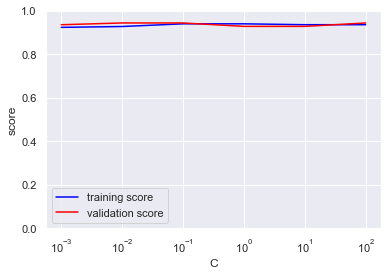

In [25]:
#logistic regression
from sklearn.model_selection import validation_curve
C_range =  [0.001, 0.01, 0.1, 1, 10, 100]

train_score, val_score = validation_curve(LogisticRegression(solver='lbfgs', max_iter=200), x_train, y_train,
                                          param_name='C', param_range=C_range, cv=5)

plt.plot(C_range, np.median(train_score, 1), color='blue', label='training score')
plt.plot(C_range, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('C')
plt.ylabel('score');
plt.xscale('log')

Different hyperparamerters don't make too much difference. I decide to choose 0.1, for the scores are almost equal.

In [26]:
#final model
log = LogisticRegression(solver='lbfgs', max_iter=200, C=0.1)
log.fit(x_train, y_train)

LogisticRegression(C=0.1, max_iter=200)

In [27]:
#decision tree
from sklearn.model_selection import GridSearchCV

tree_range = {"max_depth": list(range(1, 10)), "min_samples_leaf": list(range(1, 10))}

grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_range, cv = 5)
grid_tree.fit(x_train, y_train)

tree = grid_tree.best_estimator_

I use grid search to find the best model

In [28]:
#load the test dataset
test = pd.read_csv('creditcard_test.csv')
test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,40086,1.083693,1.179501,-1.346150,1.998824,0.818034,-0.771419,0.230307,0.093683,-0.167594,-1.959809,2.804335,0.312424,-0.595976,-4.662577,-0.299515,1.001414,3.902825,1.619609,-0.888087,-0.060159,-0.312000,-0.639700,-0.120249,-0.180218,0.609283,-0.339524,0.096701,0.114972,1.00,1
1,93860,-10.850282,6.727466,-16.760583,8.425832,-10.252697,-4.192171,-14.077086,7.168288,-3.683242,-15.239962,8.030708,-16.060306,0.270530,-14.952981,-0.241095,-11.866731,-15.486990,-5.748652,4.130031,-0.646818,2.541637,0.135535,-1.023967,0.406265,0.106593,-0.026232,-1.464630,-0.411682,78.00,1
2,14152,-4.710529,8.636214,-15.496222,10.313349,-4.351341,-3.322689,-10.788373,5.060381,-5.689311,-11.712187,11.152491,-16.558197,0.302645,-17.475921,-0.412393,-10.222203,-13.799148,-5.008585,1.162026,1.434240,1.990545,0.223785,0.554408,-1.204042,-0.450685,0.641836,1.605958,0.721644,1.00,1
3,27219,-25.266355,14.323254,-26.823673,6.349248,-18.664251,-4.647403,-17.971212,16.633103,-3.768351,-8.303239,4.783257,-6.699252,0.846768,-6.576276,-0.062330,-5.961660,-12.218482,-4.791842,0.894854,1.658289,1.780701,-1.861318,-1.188167,0.156667,1.768192,-0.219916,1.411855,0.414656,99.99,1
4,84204,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,1.205868,-4.382713,-8.337707,7.190306,-9.424844,-0.223293,-12.875494,-0.071918,-6.299961,-12.719207,-3.740176,0.844060,2.172709,1.376938,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081,512.25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,120916,-0.384786,1.394275,0.267225,1.128416,0.262889,-1.401008,1.302819,-0.231391,-0.246976,0.365281,-0.591344,-0.794657,-2.293781,0.844874,-0.164527,-1.407399,0.614616,-0.444646,0.404688,0.016315,0.115802,0.655003,-0.168034,0.834923,-0.107507,-0.418825,0.538397,0.306241,3.09,0
146,65203,0.088096,-3.474426,0.383327,-0.665527,-2.562842,0.281356,-0.689747,-0.075855,-1.307729,0.935892,-0.476851,-0.390112,1.120484,-0.778833,0.492148,-0.544981,0.839274,-0.049261,-0.884557,1.077353,0.398173,0.178293,-0.607427,0.144338,0.035938,-0.090925,-0.035265,0.148624,702.68,0
147,81511,1.098672,0.096097,-0.004681,0.401689,0.031572,-0.433662,0.326733,-0.064347,-0.494098,0.038277,1.752673,1.189119,0.181393,0.668579,0.292006,-0.073038,-0.235708,-0.853617,0.022898,-0.003155,-0.270854,-0.922326,0.115922,0.027471,0.173078,0.144112,-0.059399,0.005414,57.90,0
148,172260,0.029925,0.540433,-1.188383,-1.728700,2.927242,3.404440,0.343663,0.924795,-0.166380,-0.388560,-0.199629,0.031569,-0.374376,0.354226,0.041345,-0.154371,-0.482601,-0.841748,-0.206830,0.026618,-0.265053,-0.716458,0.112752,0.688303,-0.459479,0.161882,0.264741,0.090376,3.59,0


In [29]:
#test accuracy
from sklearn.metrics import accuracy_score
x_test = test.drop(['Class'], axis=1)
y_test = test['Class']

y_predict_nb = nb.predict(x_test)
y_predict_log = log.predict(x_test)
y_predict_tree = tree.predict(x_test)

print("GaussianNB has a test score:           ", accuracy_score(y_test, y_predict_nb)* 100, "% accuracy score")
print("LogisticRegression has a test score:   ", accuracy_score(y_test, y_predict_log)* 100, "% accuracy score")
print("DecisionTree has a test score:         ", round(accuracy_score(y_test, y_predict_tree)* 100, 1), "% accuracy score")

GaussianNB has a test score:            92.0 % accuracy score
LogisticRegression has a test score:    96.0 % accuracy score
DecisionTree has a test score:          94.0 % accuracy score


Because I do undersample randomly, the training data may change. After I tried many times, LogisticRegression performs the best

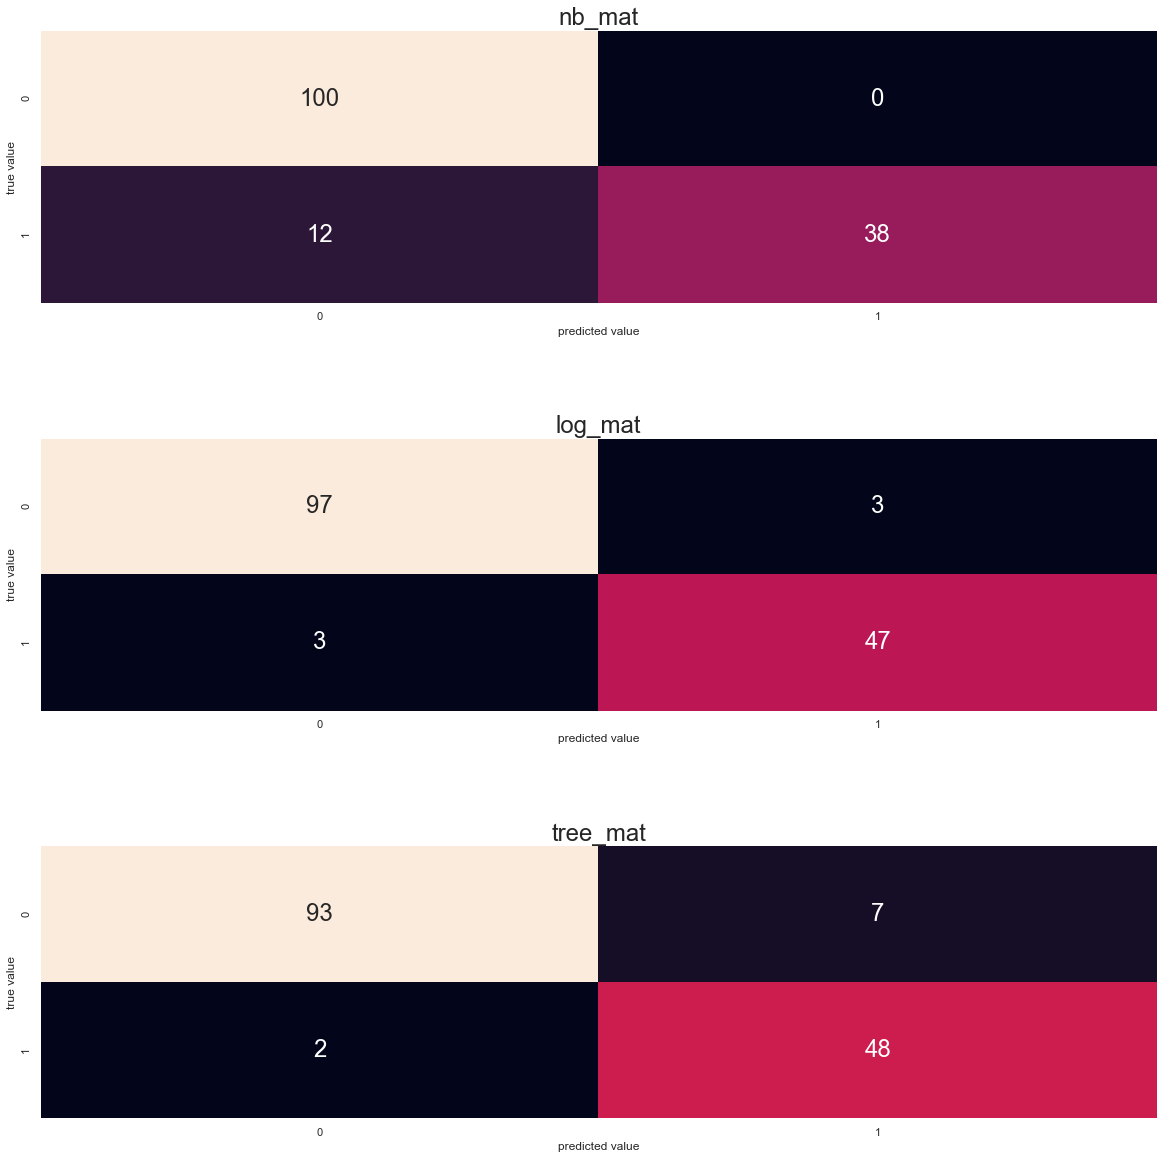

In [30]:
#cofusion matrix 
from sklearn.metrics import confusion_matrix
nb_mat = confusion_matrix(y_test, y_predict_nb)
log_mat = confusion_matrix(y_test, y_predict_log)
tree_mat = confusion_matrix(y_test, y_predict_tree)

fig, axes = plt.subplots(3, 1,figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
sns.set(font_scale=2.0)
mat = [nb_mat, log_mat, tree_mat]
matname = ['nb_mat', 'log_mat', 'tree_mat']

for i, ax in enumerate(axes.flat):
    sns.heatmap(mat[i], ax = ax, annot=True, cbar=False, fmt='g')
    ax.set_title(matname[i])
    ax.set_xlabel('predicted value')
    ax.set_ylabel('true value');



GaussianNB classify the least normal data as fraud data. LogisticRegression and DecisionTree can minimize the amount of fraud data that isn't detected.

### Module 5: Summary
Summarize your findings and draw conclusions.

There are several variables distributed differently in fraud and normal groups. V12, V14, V16, V17 distribute similarly: the majority are smaller in fraud group than in normal group. V4, V11 distribute similarly: the majority are bigger in fraud group than in normal group. 

2 components in PCA are not enough to distinguish different groups. At least over 15 components can explain 80% variance. 

GaussianNB, LogisticRegression and DecisionTree can all get accuracy rates of 90%. I think LogisticRegression is better, because it has a slightly higher accuracy rate and is less likely to miss a fraud case.